In [8]:
%load_ext autoreload
%autoreload 2

In [20]:

import importlib
import add_relative_prices2
importlib.reload(add_relative_prices2)

<module 'add_relative_prices2' from 'c:\\Users\\John DeForest\\Desktop\\stonx\\add_relative_prices2.py'>

In [26]:
# dr2
from get_oip_1p import get_oip_1p
from add_prices_to_oip import add_prices_to_oip
from remove_failed_tickers import remove_failed_tickers
from add_relative_prices2 import add_prices_to_oip_precise
from add_return_columns import add_return_columns
from train_rf_forward_return_model import train_rf_forward_return_model
from plot_predicted_vs_actual import plot_predicted_vs_actual
from run_rf_model_for_all_forward_returns import run_rf_model_for_all_forward_returns
import pandas as pd
import time
from single_positrader import single_positrader
from simulate_all_tickers import simulate_all_tickers
import matplotlib.pyplot as plt

import filter_functions

In [ ]:
#5/01/22 - 23 (same as dr1)
oiurl = 'http://openinsider.com/screener?s=&o=&pl=&ph=&ll=&lh=&fd=-1&fdr=05%2F01%2F2022+-+05%2F01%2F2023&td=0&tdr=&fdlyl=&fdlyh=&daysago=&xp=1&vl=&vh=&ocl=&och=&sic1=-1&sicl=100&sich=9999&grp=0&nfl=&nfh=&nil=&nih=&nol=&noh=&v2l=&v2h=&oc2l=&oc2h=&sortcol=0&cnt=1000&page=1'
oip = get_oip_1p(oiurl)


print(oip.head())
print('number of rows:', len(oip))
tickers = oip["ticker"].unique().tolist()
print(oip.columns)

     x         filing_date trade_date ticker  \
0    D 2023-05-01 21:31:53 2023-04-28   USGO   
1    D 2023-05-01 20:33:46 2023-05-01   BANC   
2  NaN 2023-05-01 19:51:48 2023-05-01     PI   
3   DM 2023-05-01 19:29:20 2023-04-26   FOMC   
4  NaN 2023-05-01 19:08:00 2023-04-27   KREF   

                         company_name          insider_name          title  \
0                U.S. Goldmining Inc.  Bukacheva Aleksandra            Dir   
1            Banc of California, Inc.         Wolff Jared M      Pres, CEO   
2                          Impinj Inc          Sanghi Steve            Dir   
3                Fomo Worldwide, Inc.       Grover Vikram P  CEO, Dir, 10%   
4  Kkr Real Estate Finance Trust Inc.       Salem Matthew A            CEO   

     trade_type      qty    owned   δown      value  1d  1w  1m  6m  \
0  P - Purchase     1000     1000    New     9150.0 NaN NaN NaN NaN   
1  P - Purchase     6769   273252    +3%    75118.0 NaN NaN NaN NaN   
2  P - Purchase    23500    4

In [37]:
window = [1,2,3,4,5,6,7,8,9,10,15,20,35,60,90,130,180,245]
oip_w_prices, error_dict = add_prices_to_oip_precise(oip, fwindow=window, bwindow=window)
with pd.option_context('display.max_columns', None):
    #print(df.head())
    print(oip_w_prices.head(3))
print(error_dict)

1 Failed download:
['FOMC']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['CSTR']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['SMMF']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['HMNF']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['CVCY']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['BECN']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['SCWX']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['BCOV']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['AHNR']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['AULT']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['HHC']: YFTzMissingError('possibly 

     x filing_date trade_date ticker              company_name  \
0    D  2023-05-01 2023-04-28   USGO      U.S. Goldmining Inc.   
1    D  2023-05-01 2023-05-01   BANC  Banc of California, Inc.   
2  NaN  2023-05-01 2023-05-01     PI                Impinj Inc   

           insider_name      title    trade_type    qty   owned   δown  \
0  Bukacheva Aleksandra        Dir  P - Purchase   1000    1000    New   
1         Wolff Jared M  Pres, CEO  P - Purchase   6769  273252    +3%   
2          Sanghi Steve        Dir  P - Purchase  23500   42231  +125%   

       value  1d  1w  1m  6m  trade_price  d_own_plus%  mebuydate    p_p1_td  \
0     9150.0 NaN NaN NaN NaN         9.15          NaN 2023-05-02       9.76   
1    75118.0 NaN NaN NaN NaN        11.10          3.0 2023-05-02  10.065261   
2  1997500.0 NaN NaN NaN NaN        85.00        125.0 2023-05-02  87.720001   

    v_p1_td    p_p2_td   v_p2_td    p_p3_td   v_p3_td    p_p4_td    v_p4_td  \
0   29200.0       10.2   90000.0      

In [38]:
len(error_dict)

89

In [ ]:
#SOMWHERE HERE NEED TO RUN CODE TO 

#1) export error_dict as failed tickers dict to xl for manual check?
#2) manual url retrieval? or llm based agent search to get correct investing.com urls
#3) run script to get all investing.com data for all missing (from yahoofinance) (but valid) stocks
#4) run script to pull from those many downloaded csvs to a df
#5) run an EQUIVALENT BUT MODIFIED add_prices_to_oip_precise for these new data, 
    #5b) merge this df with the main stock df

#6) run filtering algo(s) - zero vol, zero price, ADDV, min vol, min $ flow etc
#7) run some viz to look at included vs excluded stocks
#7.5) add returns computation
#7.6) add trade-to-file or trade-to-mebuy delay to df (feature)
#7.7) add trade-to-mebuy price change to df (feature)

#8) fit model - RF? some other time-series vecto autoreg? dynamic hold dur pred? return trade +%^ confidence? <-useful?
    #8a) tune model? ver vs val/train-test loss viz?
    #8b) R^2, F1, recall/precision metric sorting
    #8c) model selection
#9) pull out-of-training set OI data
    #9b) format like training data dfs
#10) pass into model, predict returns

#11) simulate trading strategy
    #skip negative predicted returns (duh)
    #skip small pos pred returns? ie threshold if pred to return less than 1% over the pred ideal hold duration
    #incl ADDV restriction - ie: give maximum trade size - cant go over say 1% (or .5%) of avg daily $ vol
    #dynamic buy based on +^% confidence (if part of model)
    #add buy/hold checkins to RF/conditional model - 
        #if after 1 day of hold it goes down x%, how likely to still finish in the green?

In [39]:
#6: run filtering algo(s) - ADDV, min vol, min $ flow etc
from filter_functions import *
lookbackcutoff = 95 #scan past 95 trading days for illiquidity
filterwindow=[x for x in window if x<lookbackcutoff]
#ONLY LOOK BACK (not fair to look forward...)
price_cols =  [f'p_m{n}_td' for n in filterwindow] #[f'p_p{n}_td' for n in window] +
vol_cols   =  [f'v_m{n}_td' for n in filterwindow] #[f'v_p{n}_td' for n in window] +

min_ADDV = 10000
#filter out really dead stocks 
# that move less than ^$10000 /day - cant trade more than $100 w/o >1% moving the market...
#TODO: test sensitivity - am i wiping out too many? leaving in too many illiquid bads?
#

oip_w_prices, addv_cols = add_addv_columns(oip_w_prices, price_prefix='p_m', vol_prefix='v_m')
oip_liquid, oip_excluded, oip_flagged = liquidity_filter_first_failure(
    oip_w_prices, addv_cols, vol_cols, price_cols,
    min_addv=min_ADDV, min_volume=100, min_price=1.0
)


print(f"Kept {len(oip_liquid)} out of {len(oip_w_prices)} trades after filtering for liquidity.")



--- Liquidity filter exclusion summary (first failure wins[0vol/0p/lovol/lop/loaddv]) ---
zero_volume : 267 rows (26.7%)
low_addv    : 73 rows (7.3%)
low_price   : 51 rows (5.1%)
low_vol     : 16 rows (1.6%)

Kept 593 / 1000 rows (59.3%) after filtering.
Kept 593 out of 1000 trades after filtering for liquidity.


In [ ]:
#7.5) add returns computation (both for fwd and back windows) relative to mebuy price
    #add each as a new column - ie: r_m{n}_td for minus n trading days and r_p{n}
#7.6) add trade-to-mebuy delay in #days to df (feature - new column)
#7.7) add trade-to-mebuy price change to df (feature - new column)
    # relative price change-ie%? or absolute? maybe rel. 
    # ie: if goes up in the period between insider trade and me realistically buying, count as +x% of @insider purchase date price
#current working df: oip_liquid
from add_return_columns import add_return_columns
from trade_delay_fns import *

oip_liquid = add_return_columns(oip_liquid)

# 7.6 - Add trade-to-mebuy delay in days
oip_liquid = add_trade_to_mebuy_delay(oip_liquid, trade_date_col='trade_date', mebuy_date_col='mebuydate')

#7.7a: get price at the insider buy date - newcol: 'closeprice_at_insiderbuy'
oip_liquid = add_closeprice_at_insiderbuy(oip_liquid, mebuydate_col='mebuydate', trade_to_mebuy_days_col='trade_to_mebuy_days')

# 7.7 - Add trade-to-mebuy price change (relative)
oip_liquid = add_trade_to_mebuy_price_change(
    oip_liquid, 
    trade_price_col='closeprice_at_insiderbuy', 
    mebuy_price_col='mebuy_price'
)


In [47]:
with pd.option_context('display.max_columns', None):
    #print(df.head())
    print(oip_liquid.head(3))

     x filing_date trade_date ticker                        company_name  \
1    D  2023-05-01 2023-05-01   BANC            Banc of California, Inc.   
2  NaN  2023-05-01 2023-05-01     PI                          Impinj Inc   
4  NaN  2023-05-01 2023-04-27   KREF  Kkr Real Estate Finance Trust Inc.   

      insider_name      title    trade_type    qty   owned   δown      value  \
1    Wolff Jared M  Pres, CEO  P - Purchase   6769  273252    +3%    75118.0   
2     Sanghi Steve        Dir  P - Purchase  23500   42231  +125%  1997500.0   
4  Salem Matthew A        CEO  P - Purchase  25000  386817    +7%   267563.0   

   1d  1w  1m  6m  trade_price  d_own_plus%  mebuydate    p_p1_td   v_p1_td  \
1 NaN NaN NaN NaN         11.1          3.0 2023-05-02  10.065261  764700.0   
2 NaN NaN NaN NaN         85.0        125.0 2023-05-02  87.720001  677600.0   
4 NaN NaN NaN NaN         10.7          7.0 2023-05-02   8.123054  639800.0   

     p_p2_td   v_p2_td    p_p3_td   v_p3_td    p_p4_td   

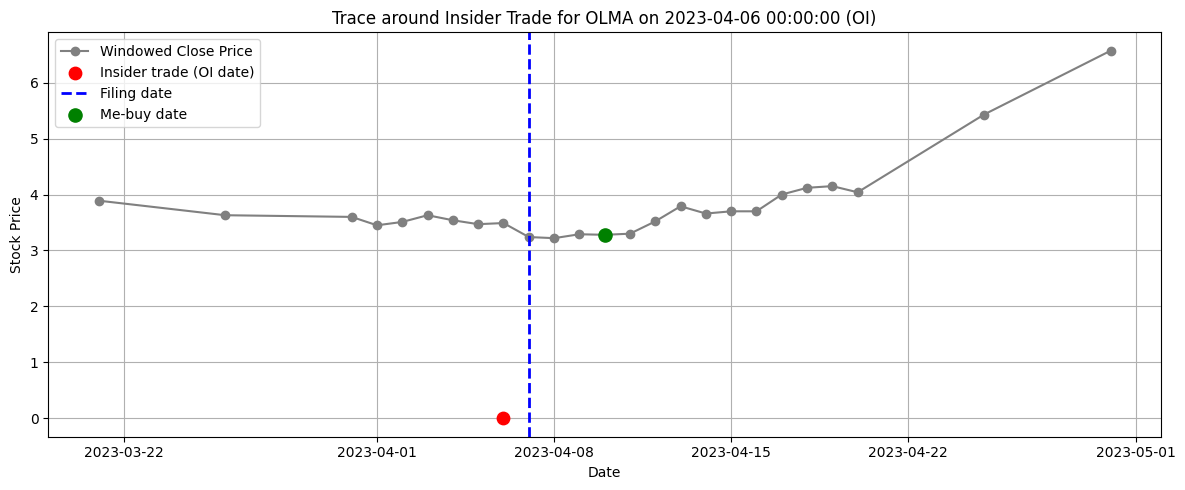

In [ ]:
#side: finding weird insider_price outlier (0$??)
import pandas as pd
import matplotlib.pyplot as plt

# Find rows where trade_price is zero or NaN
zero_trade_price_rows = oip_liquid[(oip_liquid['trade_price'] == 0) | (oip_liquid['trade_price'].isna())]
# Print all columns for these rows
with pd.option_context('display.max_columns', None):
    print(zero_trade_price_rows)

def plot_trade_price_trace(row, fwindow, bwindow):
    mebuy_price = float(row['mebuy_price'])
    mebuy_date = pd.to_datetime(row['mebuydate'])

    lookback_days = sorted(bwindow)
    lookback_prices = [float(row[f'p_m{n}_td']) if pd.notnull(row[f'p_m{n}_td']) else None for n in lookback_days]
    lookback_dates = [mebuy_date - pd.Timedelta(days=n) for n in lookback_days]

    lookfwd_days = sorted(fwindow)
    lookfwd_prices = [float(row[f'p_p{n}_td']) if pd.notnull(row[f'p_p{n}_td']) else None for n in lookfwd_days]
    lookfwd_dates = [mebuy_date + pd.Timedelta(days=n) for n in lookfwd_days]

    all_dates = lookback_dates[::-1] + [mebuy_date] + lookfwd_dates
    all_prices = lookback_prices[::-1] + [mebuy_price] + lookfwd_prices

    plt.figure(figsize=(12,5))
    plt.plot(all_dates, all_prices, '-o', label='Windowed Close Price', color='gray')

    # Red dot: Insider trade
    trade_date = pd.to_datetime(row['trade_date'])
    trade_price = float(row['trade_price'])
    plt.scatter([trade_date], [trade_price], color='red', label='Insider trade (OI date)', zorder=5, s=80)

    # Vertical line: Filing date
    filing_date = pd.to_datetime(row['filing_date'])
    plt.axvline(filing_date, color='blue', linestyle='--', label='Filing date', linewidth=2)

    # Green dot: mebuydate
    plt.scatter([mebuy_date], [mebuy_price], color='green', label='Me-buy date', zorder=6, s=90)

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f"Trace around Insider Trade for {row['ticker']} on {row['trade_date']} (OI)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage:
# plot_trade_price_trace(oip_liquid.loc[543], fwindow, bwindow)
fwindow = [1,2,3,4,5,6,7,8,9,10,15,20]
bwindow = fwindow
row = oip_liquid.loc[543]    # or: row = oip_liquid.iloc[0] for first row

plot_trade_price_trace(row, fwindow, bwindow)